In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

import warnings
warnings.filterwarnings('ignore')


In [22]:
true_df = pd.read_csv("True.csv")
fake_df = pd.read_csv("Fake.csv")
true_df["target"] = 1
fake_df["target"] = 0
df = pd.concat([true_df, fake_df], ignore_index=True)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [23]:
df.columns
df.shape
len(df)
df.info()
df.dtypes
df.isnull().sum()
len(df.columns)
df['target'].unique()
df['target'].nunique()
df['target'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   target   44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


target
0    23481
1    21417
Name: count, dtype: int64

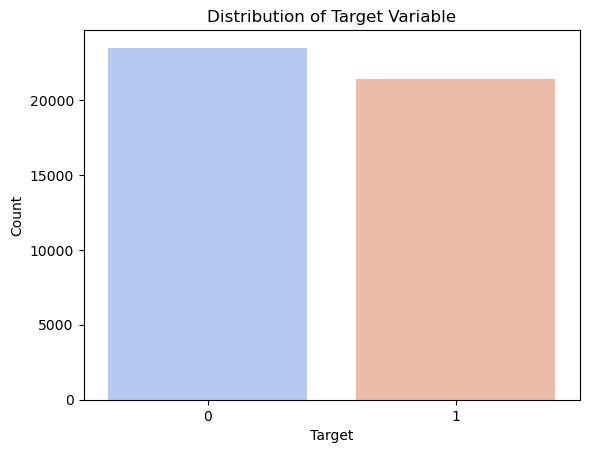

In [24]:
sns.countplot(x='target', data=df, palette='coolwarm')
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

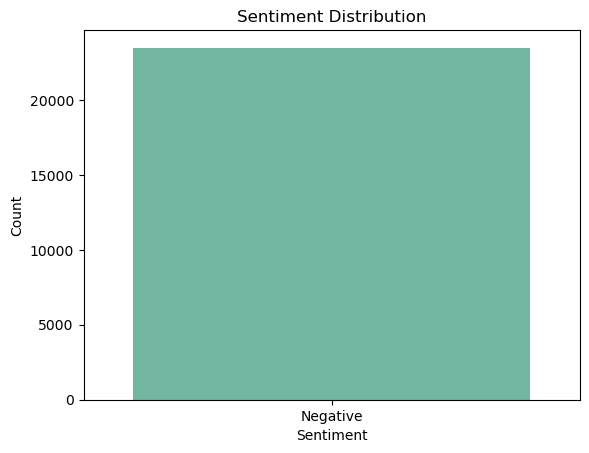

In [21]:
df['sentiment'] = df['target'].map({0: 'Negative', 4: 'Positive'})

sns.countplot(x='sentiment', data=df, palette='Set2')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [25]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [26]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ubait\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ubait\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [27]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [28]:
def clean_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)


In [29]:
df['text'] = df['text'].apply(clean_text)

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
X = tfidf.fit_transform(df['text'])
y = df['target']


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)


LogisticRegression()

In [33]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)


MultinomialNB()

In [34]:
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

LinearSVC()

In [35]:
lr_pred = lr_model.predict(X_test)
print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, lr_pred))
print("Classification Report:\n", classification_report(y_test, lr_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, lr_pred))

Logistic Regression Results:
Accuracy: 0.9837416481069042
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      4669
           1       0.98      0.98      0.98      4311

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980

Confusion Matrix:
 [[4593   76]
 [  70 4241]]


In [36]:
nb_pred = nb_model.predict(X_test)
print("\nNaive Bayes Results:")
print("Accuracy:", accuracy_score(y_test, nb_pred))
print("Classification Report:\n", classification_report(y_test, nb_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, nb_pred))

# Linear SVM Evaluation


Naive Bayes Results:
Accuracy: 0.9383073496659243
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94      4669
           1       0.93      0.95      0.94      4311

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980

Confusion Matrix:
 [[4351  318]
 [ 236 4075]]


In [37]:
svm_pred = svm_model.predict(X_test)
print("\nLinear SVM Results:")
print("Accuracy:", accuracy_score(y_test, svm_pred))
print("Classification Report:\n", classification_report(y_test, svm_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, svm_pred))



Linear SVM Results:
Accuracy: 0.9946547884187082
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      4669
           1       0.99      0.99      0.99      4311

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

Confusion Matrix:
 [[4643   26]
 [  22 4289]]


In [38]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


In [39]:
lr_probs = lr_model.predict_proba(X_test)[:, 1]
nb_probs = nb_model.predict_proba(X_test)[:, 1]


In [40]:
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)

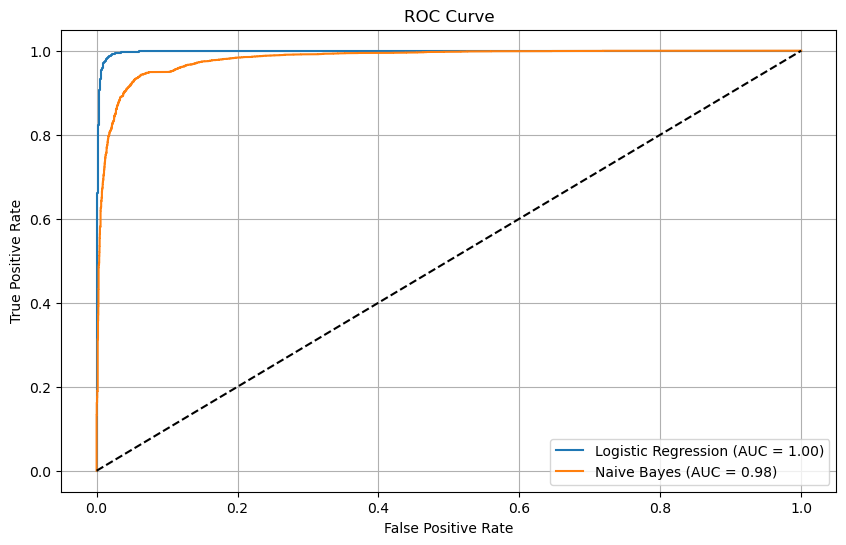

In [41]:
plt.figure(figsize=(10, 6))
plt.plot(lr_fpr, lr_tpr, label='Logistic Regression (AUC = %0.2f)' % auc(lr_fpr, lr_tpr))
plt.plot(nb_fpr, nb_tpr, label='Naive Bayes (AUC = %0.2f)' % auc(nb_fpr, nb_tpr))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


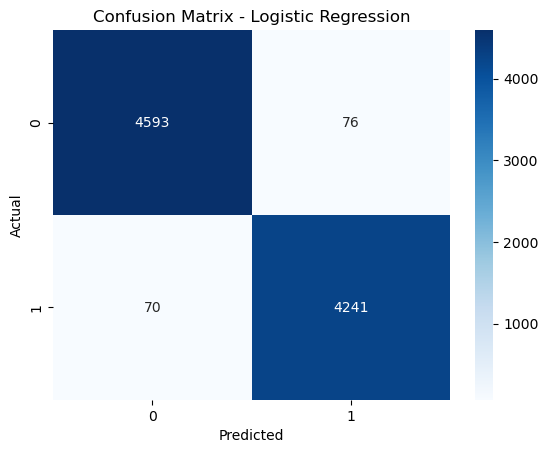

In [42]:

cm = confusion_matrix(y_test, lr_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()